In [125]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [362]:
df = pd.read_csv("ev_charging_patterns.csv")
#df = df.select_dtypes(include = ['float64', 'int64']) 
df.copy()
df.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler


In [411]:
df.isnull().sum()

User ID                                      0
Vehicle Model                                0
Battery Capacity (kWh)                       0
Charging Station ID                          0
Charging Station Location                    0
Charging Start Time                          0
Charging End Time                            0
Energy Consumed (kWh)                       66
Charging Duration (hours)                    0
Charging Rate (kW)                          66
Charging Cost (USD)                          0
Time of Day                                  0
Day of Week                                  0
State of Charge (Start %)                    0
State of Charge (End %)                      0
Distance Driven (since last charge) (km)    66
Temperature (°C)                             0
Vehicle Age (years)                          0
Charger Type                                 0
User Type                                    0
dtype: int64

In [415]:
df.isnull().sum().sum()

198

In [420]:
df = pd.read_csv("ev_charging_patterns.csv")
df = df.select_dtypes(include = ['float64', 'int64']) 
df.copy()
df.head()

,Battery Capacity (kWh),Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years)
0,108.463007,60.712346,0.591363,36.389181,13.087717,29.371576,86.119962,293.602111,27.947953,2.0
1,100.000000,12.339275,3.133652,30.677735,21.128448,10.115778,84.664344,112.112804,14.311026,3.0
2,75.000000,19.128876,2.452653,27.513593,35.667270,6.854604,69.917615,71.799253,21.002002,2.0
3,50.000000,79.457824,1.266431,32.882870,13.036239,83.120003,99.624328,199.577785,38.316313,1.0
4,50.000000,19.629104,2.019765,10.215712,10.161471,54.258950,63.743786,203.661847,-7.834199,1.0


In [422]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Battery Capacity (kWh),1320.0,74.534692,20.626914,1.532807,62.000000,75.000000,85.000000,193.003074
Energy Consumed (kWh),1254.0,42.642894,22.411705,0.045772,23.881193,42.691405,61.206218,152.238758
Charging Duration (hours),1320.0,2.269377,1.061037,0.095314,1.397623,2.258136,3.112806,7.635145
Charging Rate (kW),1254.0,25.963003,14.011326,1.472549,13.856583,25.603799,37.502998,97.342255
Charging Cost (USD),1320.0,22.551352,10.751494,0.234317,13.368141,22.076360,31.646044,69.407743
State of Charge (Start %),1320.0,49.130012,24.074134,2.325959,27.786903,48.241771,69.277921,152.489761
State of Charge (End %),1320.0,75.141590,17.080580,7.604224,62.053266,75.682496,88.201370,177.708666
Distance Driven (since last charge) (km),1254.0,153.596788,86.004987,0.862361,79.445335,152.259867,226.073284,398.364775
Temperature (°C),1320.0,15.263591,14.831216,-10.724770,2.800664,14.630846,27.981810,73.169588
Vehicle Age (years),1320.0,3.612843,2.309824,0.000000,2.000000,4.000000,6.000000,11.688592


In [424]:
df.corr()

,Battery Capacity (kWh),Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years)
Battery Capacity (kWh),1.000000,0.000323,-0.024824,0.015866,-0.000492,-0.072148,-0.011512,-0.041194,-0.036411,0.037673
Energy Consumed (kWh),0.000323,1.000000,0.028369,-0.042610,-0.007787,-0.013414,0.000600,-0.027948,-0.018509,0.017105
Charging Duration (hours),-0.024824,0.028369,1.000000,-0.013460,0.015902,-0.026016,0.006958,0.023644,-0.049575,0.001111
Charging Rate (kW),0.015866,-0.042610,-0.013460,1.000000,-0.000853,-0.019289,-0.018705,0.032209,0.012818,-0.050523
Charging Cost (USD),-0.000492,-0.007787,0.015902,-0.000853,1.000000,-0.008653,-0.063174,-0.008528,0.059864,-0.006487
State of Charge (Start %),-0.072148,-0.013414,-0.026016,-0.019289,-0.008653,1.000000,-0.021410,-0.023494,0.037751,0.016635
State of Charge (End %),-0.011512,0.000600,0.006958,-0.018705,-0.063174,-0.021410,1.000000,0.025574,0.022027,0.015671
Distance Driven (since last charge) (km),-0.041194,-0.027948,0.023644,0.032209,-0.008528,-0.023494,0.025574,1.000000,-0.023733,-0.031497
Temperature (°C),-0.036411,-0.018509,-0.049575,0.012818,0.059864,0.037751,0.022027,-0.023733,1.000000,0.026410
Vehicle Age (years),0.037673,0.017105,0.001111,-0.050523,-0.006487,0.016635,0.015671,-0.031497,0.026410,1.000000


In [370]:
df.isnull().values.any()

True

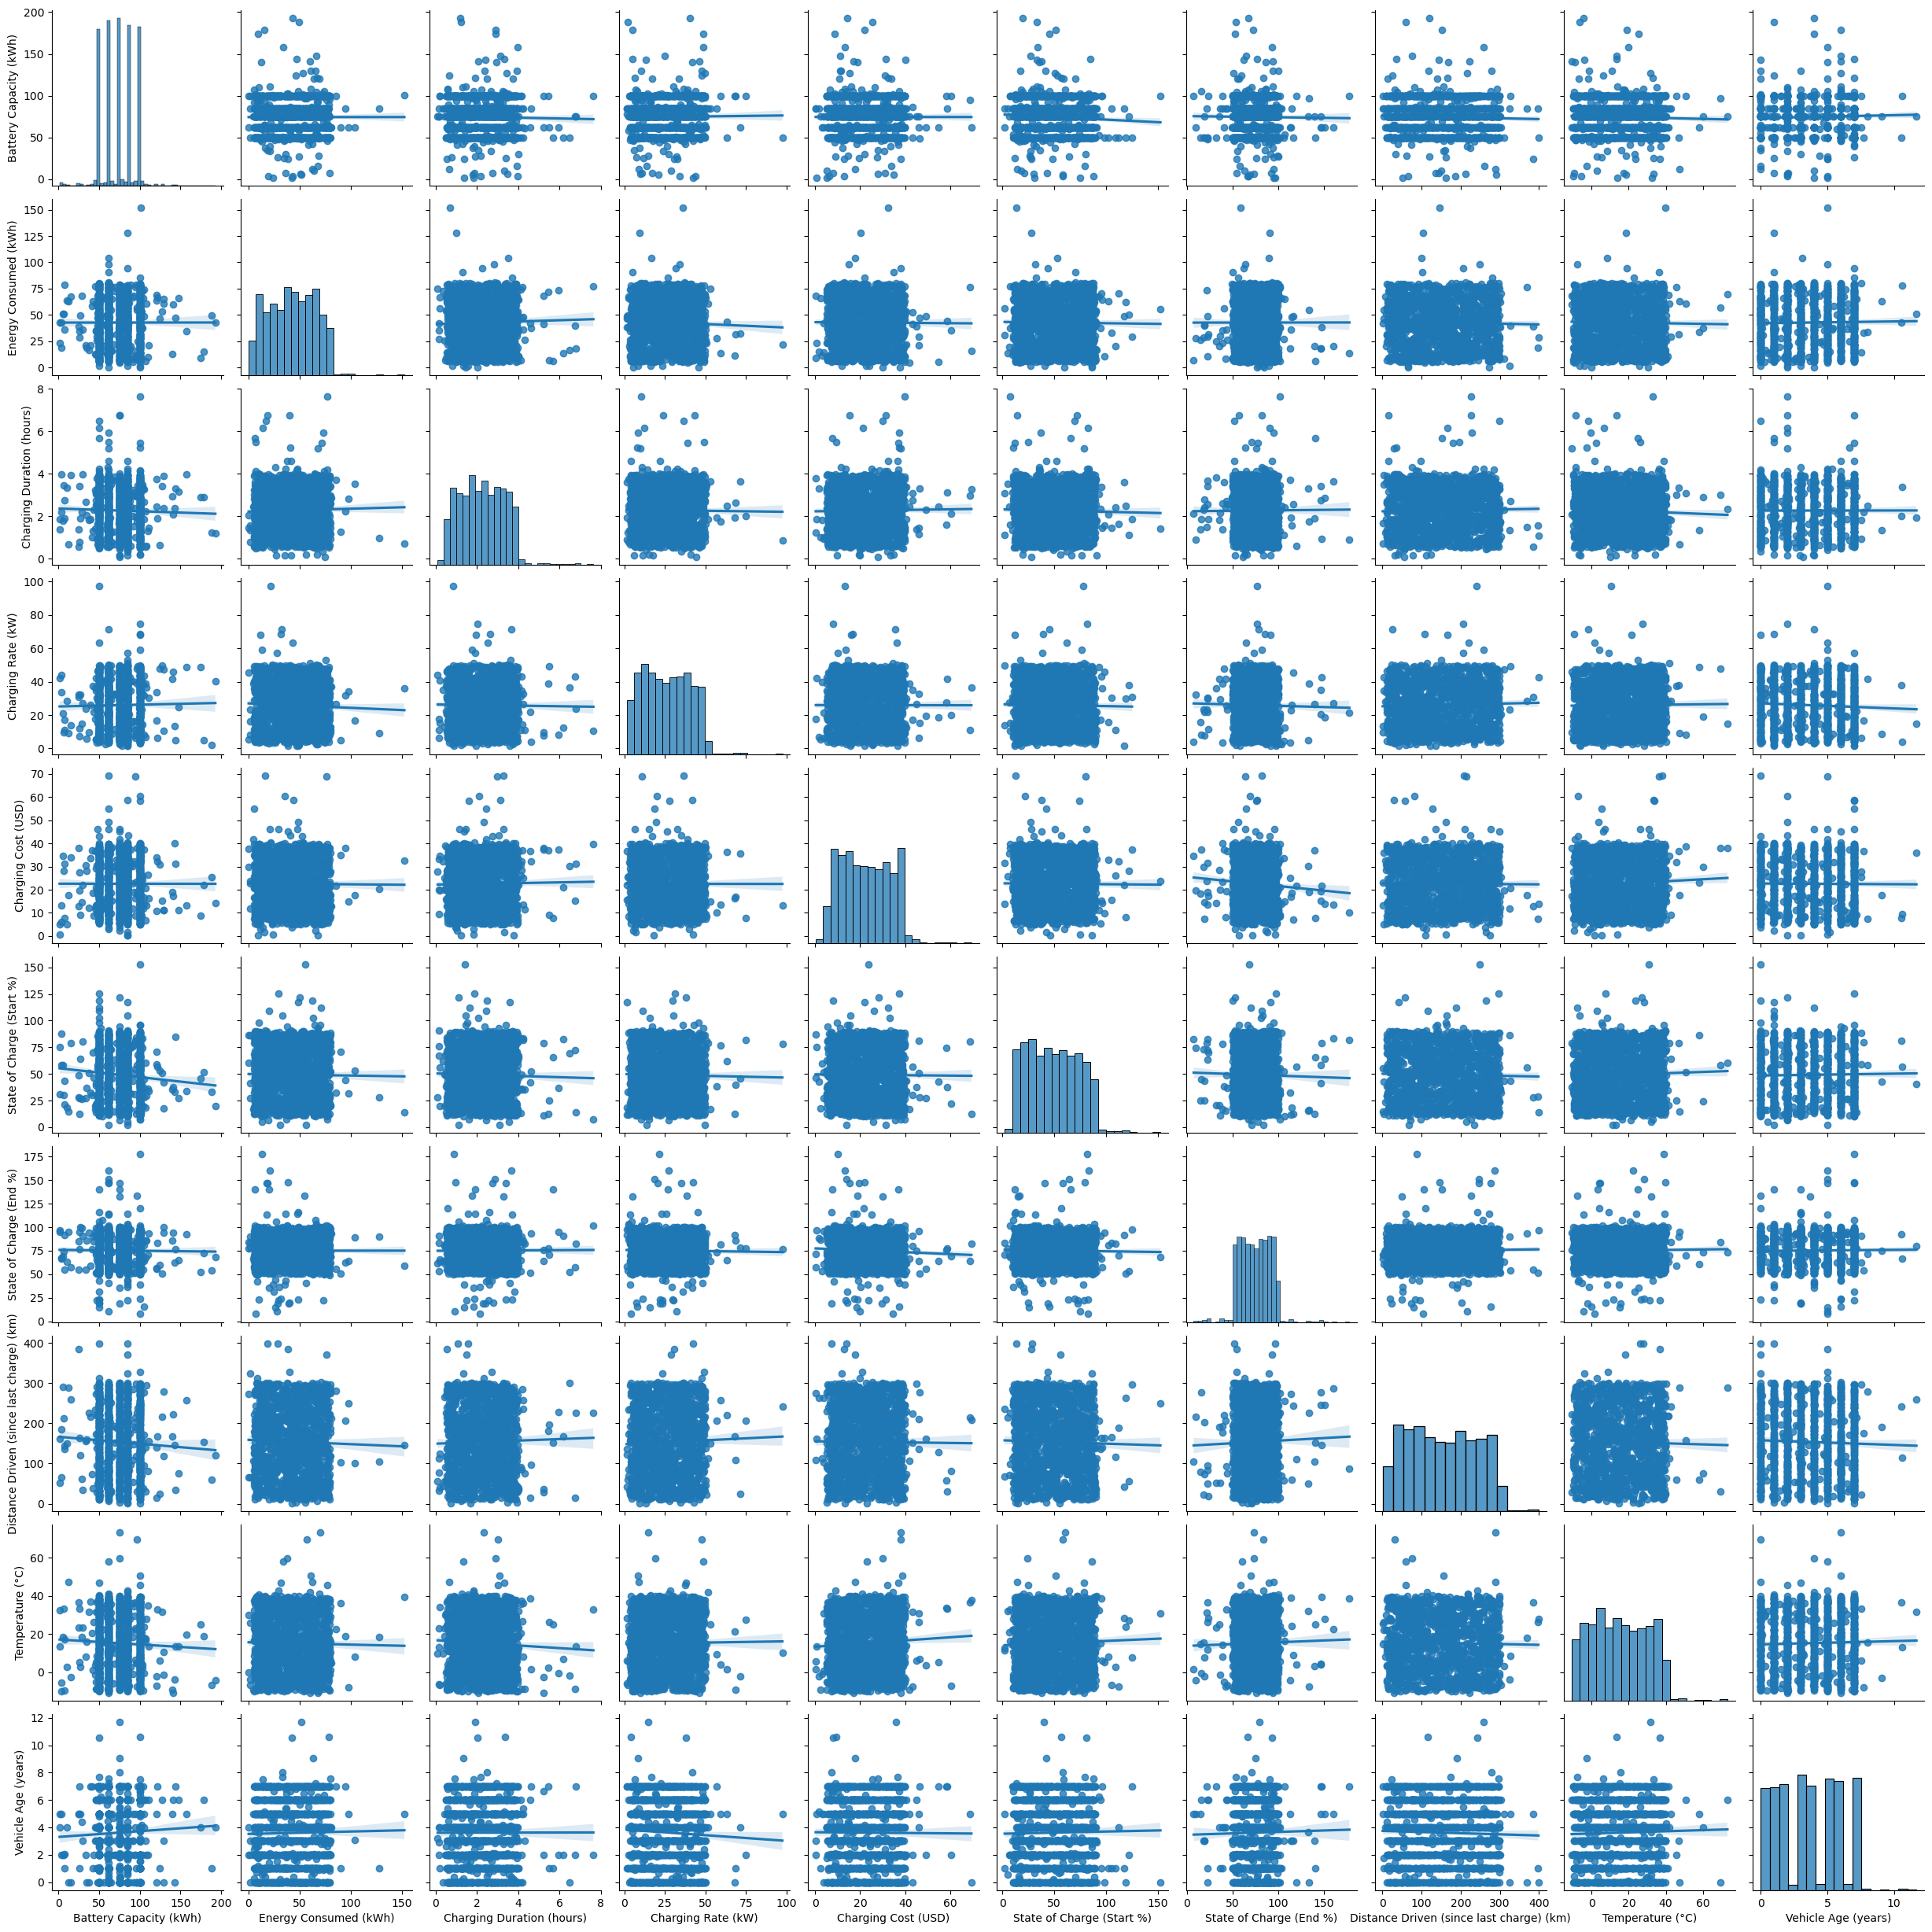

In [481]:
import seaborn as sns
sns.pairplot(df, kind  ="reg");  #I looked at the reg

In [463]:
df1 =df.apply(lambda x: x.fillna(x.mean()), axis = 0)  #sütünların ortlaamaları nun değerlere eklendi.
df1.head()
df1.isnull().values.any()

False

In [465]:
df1.corr()

,Battery Capacity (kWh),Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years)
Battery Capacity (kWh),1.000000,0.000316,-0.024824,0.015552,-0.000492,-0.072148,-0.011512,-0.040069,-0.036411,0.037673
Energy Consumed (kWh),0.000316,1.000000,0.027770,-0.040284,-0.007608,-0.013153,0.000579,-0.026369,-0.017999,0.016727
Charging Duration (hours),-0.024824,0.027770,1.000000,-0.013078,0.015902,-0.026016,0.006958,0.023094,-0.049575,0.001111
Charging Rate (kW),0.015552,-0.040284,-0.013078,1.000000,-0.000831,-0.018711,-0.018247,0.030551,0.012465,-0.049195
Charging Cost (USD),-0.000492,-0.007608,0.015902,-0.000831,1.000000,-0.008653,-0.063174,-0.008325,0.059864,-0.006487
State of Charge (Start %),-0.072148,-0.013153,-0.026016,-0.018711,-0.008653,1.000000,-0.021410,-0.023023,0.037751,0.016635
State of Charge (End %),-0.011512,0.000579,0.006958,-0.018247,-0.063174,-0.021410,1.000000,0.024944,0.022027,0.015671
Distance Driven (since last charge) (km),-0.040069,-0.026369,0.023094,0.030551,-0.008325,-0.023023,0.024944,1.000000,-0.023107,-0.030835
Temperature (°C),-0.036411,-0.017999,-0.049575,0.012465,0.059864,0.037751,0.022027,-0.023107,1.000000,0.026410
Vehicle Age (years),0.037673,0.016727,0.001111,-0.049195,-0.006487,0.016635,0.015671,-0.030835,0.026410,1.000000


In [ ]:
####Part iki doğusal olmayan modeller denencek...